<a href="https://colab.research.google.com/github/Vanitha-Jain/capstone/blob/Model-Validation/Lgbm_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 15.0 MB/s eta 0:00:00


In [2]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report,
    confusion_matrix, mean_absolute_error, cohen_kappa_score, roc_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import pandas as pd

In [3]:
np.random.seed(42)
random.seed(42)

In [4]:
df=pd.read_csv('/content/combined_dataset_FS2.csv')
df

,Unnamed: 0,APC2D1_C_N,APC2D1_C_O,APC2D2_N_O,APC2D3_C_N,APC2D4_C_X,APC2D5_N_X,APC2D5_O_F,APC2D7_N_O,APC2D7_O_O,...,AD2D336,AD2D404,AD2D414,AD2D482,AD2D492,AD2D559,AD2D560,AD2D569,AD2D570,AD2D704
0,0,1,3,2,4,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,1,2,2,4,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2,1,2,2,4,2,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,1,2,2,4,2,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,4,1,2,2,4,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,1224,3,0,0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1225,1225,2,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1226,1226,2,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1227,1227,2,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
df = df.drop('Unnamed: 0', axis=1)
X = df.drop(["class"], axis=1)
Y = df["class"]

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=42)


In [7]:
lgbm = LGBMClassifier(n_estimators=100, random_state=42)
lgbm.fit(X_train, Y_train)

[LightGBM] [Info] Number of positive: 325, number of negative: 535
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002642 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 879
[LightGBM] [Info] Number of data points in the train set: 860, number of used features: 210
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377907 -> initscore=-0.498442
[LightGBM] [Info] Start training from score -0.498442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(random_state=42)

In [8]:
y_pred = lgbm.predict(X_test)
y_pred_proba = lgbm.predict_proba(X_test)[:, 1]

In [9]:
# Evaluation Metrics
accuracy = accuracy_score(Y_test, y_pred)
auc_score = roc_auc_score(Y_test, y_pred_proba)
clf_report = classification_report(Y_test, y_pred)

In [10]:
# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
mae = mean_absolute_error(Y_test, y_pred)
kappa = cohen_kappa_score(Y_test, y_pred)

In [11]:
# Print Results
print("LGBMClassifier Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc_score:.4f}")
print(f"Classification Report:\n{clf_report}")
print("\nConfusion Matrix:")
print(conf_matrix)
print(f"\nSensitivity (Recall): {sensitivity:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Cohen's Kappa Score: {kappa:.4f}")

LGBMClassifier Evaluation Metrics:
Accuracy: 0.8266
AUC: 0.8962
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       230
           1       0.80      0.71      0.76       139

    accuracy                           0.83       369
   macro avg       0.82      0.80      0.81       369
weighted avg       0.83      0.83      0.82       369


Confusion Matrix:
[[206  24]
 [ 40  99]]

Sensitivity (Recall): 0.7122
Mean Absolute Error (MAE): 0.1734
Cohen's Kappa Score: 0.6220


In [12]:
# ROC Curve Plot
fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

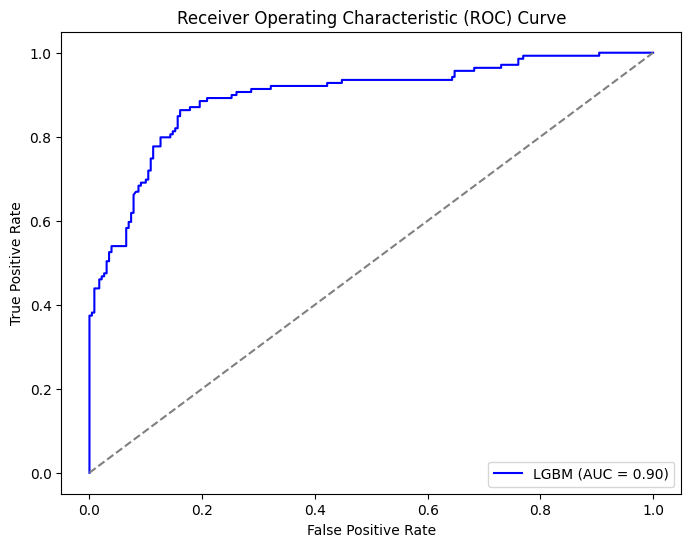

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'LGBM (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [14]:
from sklearn.model_selection import cross_val_score

In [16]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(lgbm, X, Y, cv=skf, scoring='accuracy')

print(f"Stratified K-Fold Accuracy: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores)} ± {np.std(cv_scores)}")

[LightGBM] [Info] Number of positive: 418, number of negative: 688
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 894
[LightGBM] [Info] Number of data points in the train set: 1106, number of used features: 210
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377939 -> initscore=-0.498307
[LightGBM] [Info] Start training from score -0.498307
[LightGBM] [Info] Number of positive: 418, number of negative: 688
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 898
[LightGBM] [Info] Number of data points in the train set: 1106, number of used features: 210
[LightGBM] [Info] [binary:Bo

In [17]:
import pickle

# Save model
with open("lgbm_model.pkl", "wb") as model_file:
    pickle.dump(lgbm, model_file)

# Load model
with open("lgbm_model.pkl", "rb") as model_file:
    loaded_model = pickle.load(model_file)

# Test loaded model
y_pred_loaded = loaded_model.predict(X_test)
print(f"Loaded Model Accuracy: {accuracy_score(Y_test, y_pred_loaded)}")


Loaded Model Accuracy: 0.8265582655826558


In [18]:
import pandas as pd

In [19]:
# Load unknown data
unknown_df = pd.read_excel("/content/All_Feature selection_UK.xlsx")

In [20]:
# Get the feature names used during training
training_features = loaded_model.feature_names_in_

# Select only the necessary columns from unknown_df, and reorder them
unknown_df = unknown_df.reindex(columns=training_features)

In [21]:
# Predict class labels
predictions = loaded_model.predict(unknown_df)

# Predict probabilities (if needed)
probabilities = loaded_model.predict_proba(unknown_df)

original_unknown_df = pd.read_excel("/content/All_Feature selection_UK.xlsx")
Names = original_unknown_df["Name"]

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame({
    "Name": Names,
    "Predicted_Class": predictions,
    "Probability_Class_0": probabilities[:, 0],  # Probability of class 0
    "Probability_Class_1": probabilities[:, 1]   # Probability of class 1
})

# Save predictions
predictions_df.to_csv("predictions.csv", index=False)
print("Predictions saved to predictions.csv")

Predictions saved to predictions.csv


<ipython-input-22-d807a18e40cd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=predictions_df["Predicted_Class"], palette="magma")


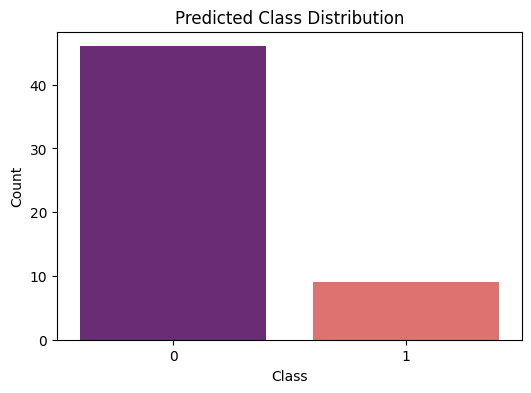

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each class
plt.figure(figsize=(6, 4))
sns.countplot(x=predictions_df["Predicted_Class"], palette="magma")

plt.title("Predicted Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

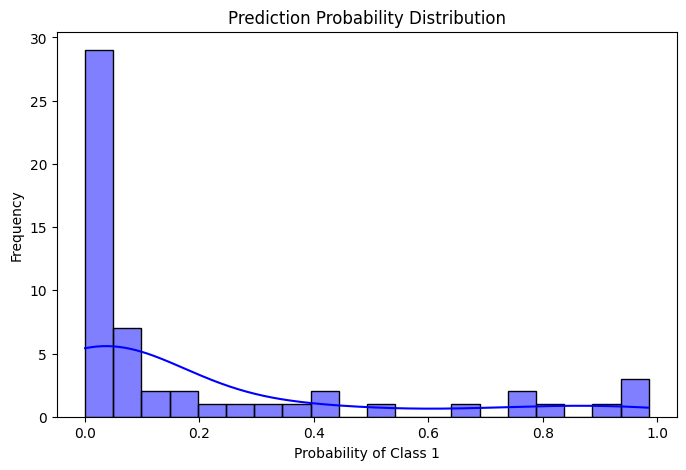

In [23]:
plt.figure(figsize=(8, 5))
sns.histplot(predictions_df["Probability_Class_1"], bins=20, kde=True, color="blue")

plt.title("Prediction Probability Distribution")
plt.xlabel("Probability of Class 1")
plt.ylabel("Frequency")
plt.show()